In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [3]:
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)



In [6]:
bundle_list = []
nside_tdc = 64
tdc_summary = [maf.metrics.MeanMetric(), maf.metrics.MedianMetric(), maf.metrics.RmsMetric()]
# Ideally need a way to do better on calculating the summary metrics
# for the high accuracy area.
slicer = maf.slicers.HealpixSlicer(nside=nside_tdc, use_cache=False)
tdcMetric = maf.metrics.TdcMetric(metric_name="TDC")
dustmap = maf.maps.DustMap(nside=nside_tdc, interp=False)
bundle = maf.MetricBundle(
    tdcMetric,
    slicer,
    constraint="night < 365",
    maps_list=[dustmap],
    summary_metrics=tdc_summary,
)
bundle_list.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:665: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn("Cannot plot object metric values with this plotter.")
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 12391 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 593 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 350 bins, returning 200
  warnings.warn(


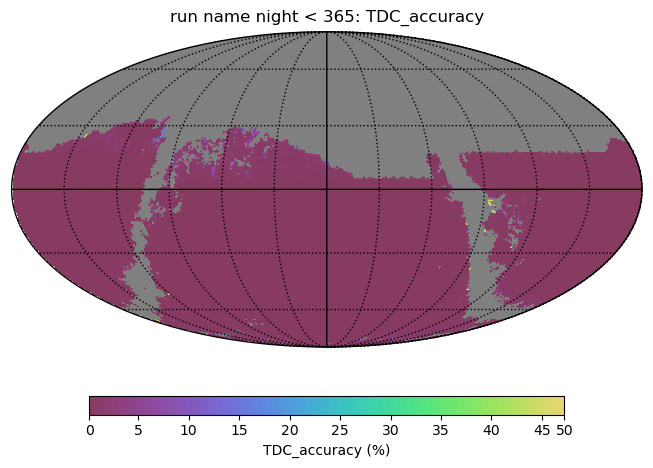

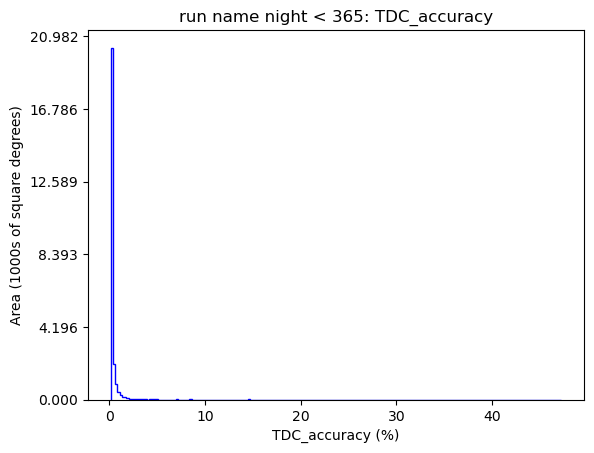

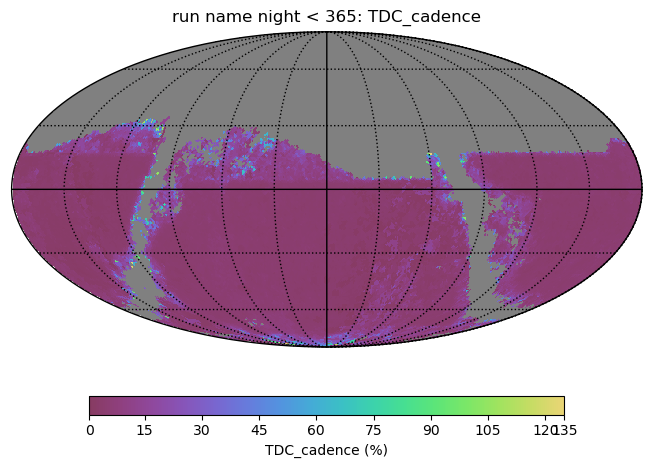

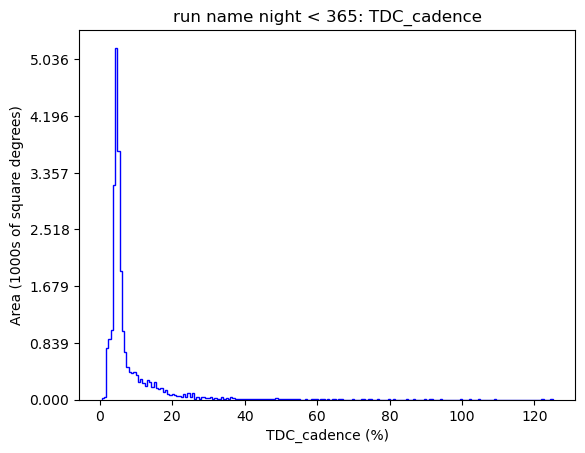

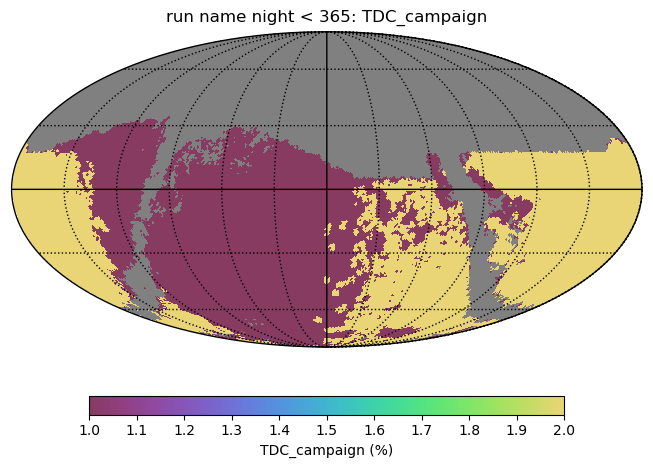

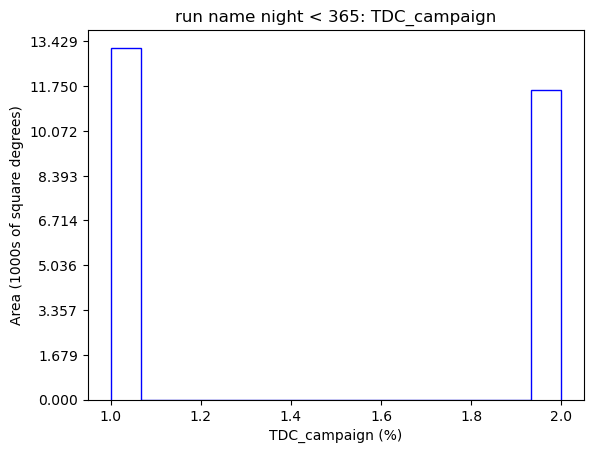

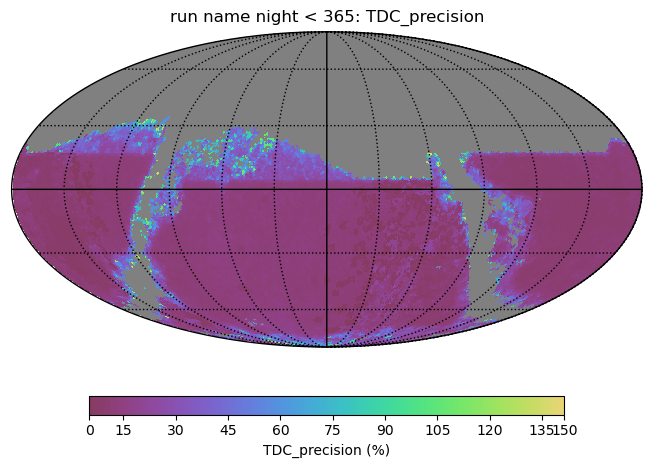

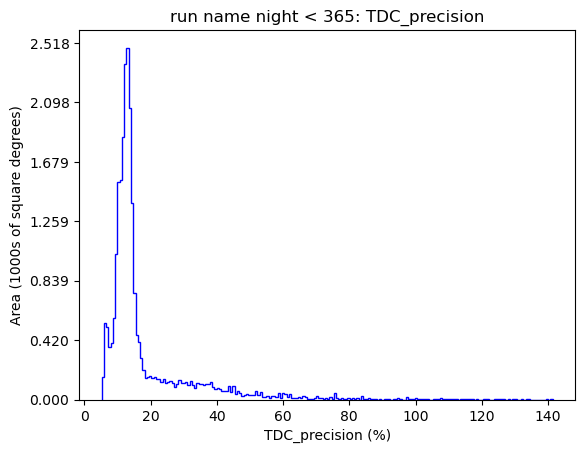

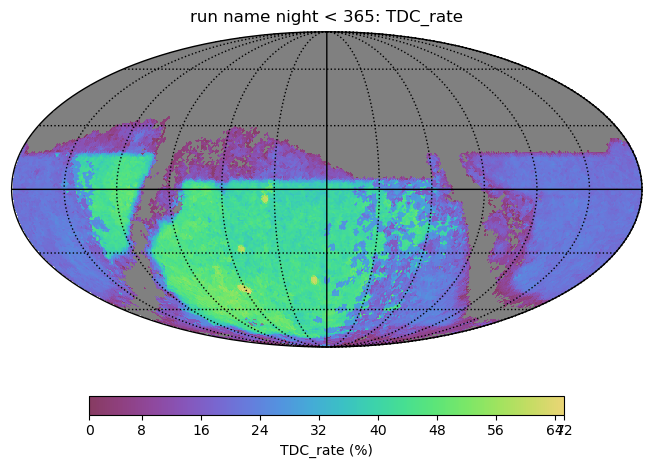

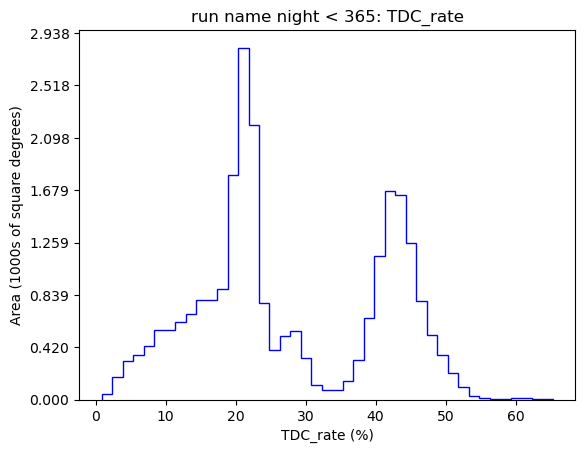

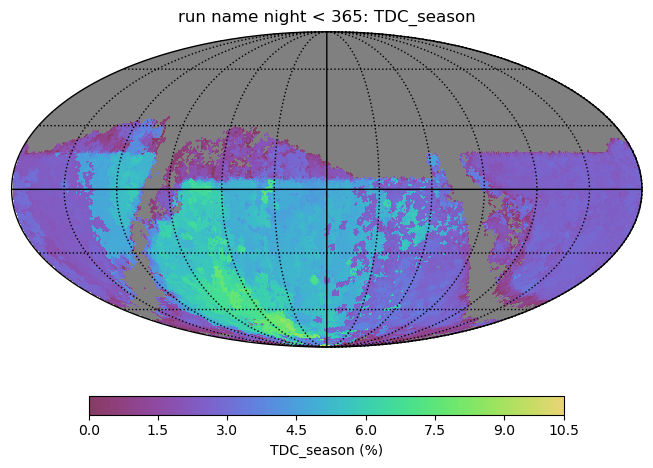

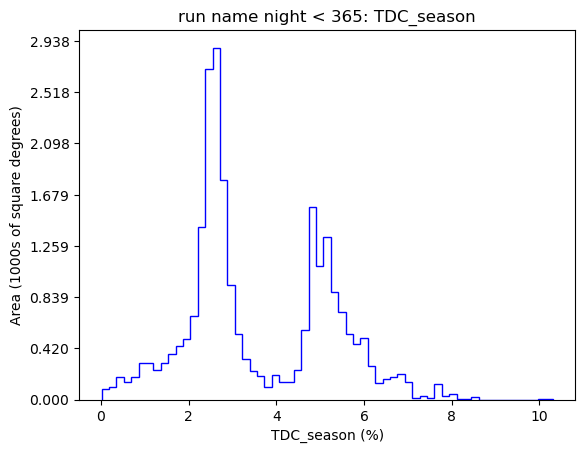

In [7]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)


In [10]:
bd['TDC_rate'].summary_values

{'Mean': 27.697656712764196,
 'Median': 22.722545525239266,
 'Rms': 13.157725132028963}

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 4945 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 302 bins, returning 200
  warnings.warn(


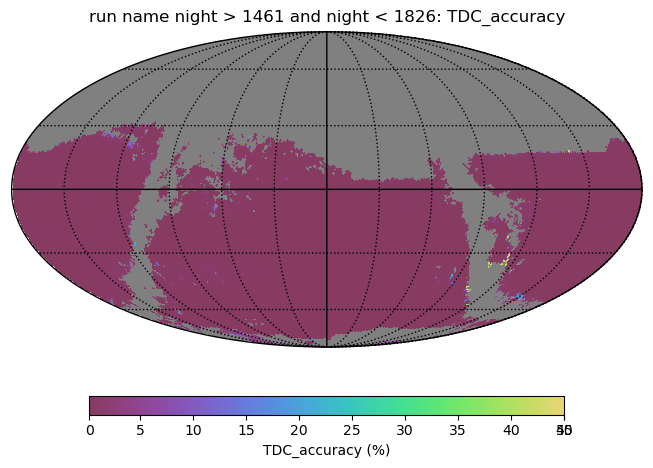

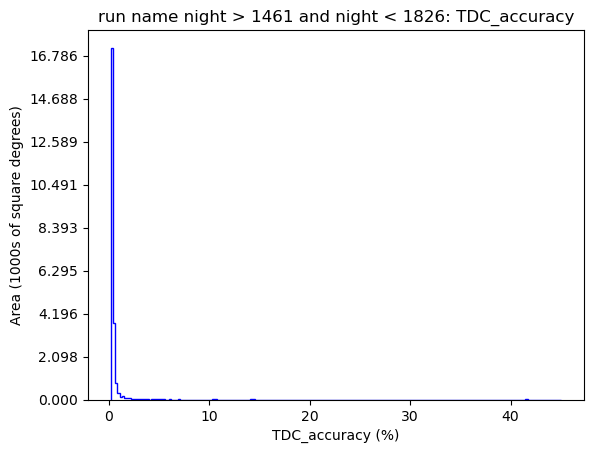

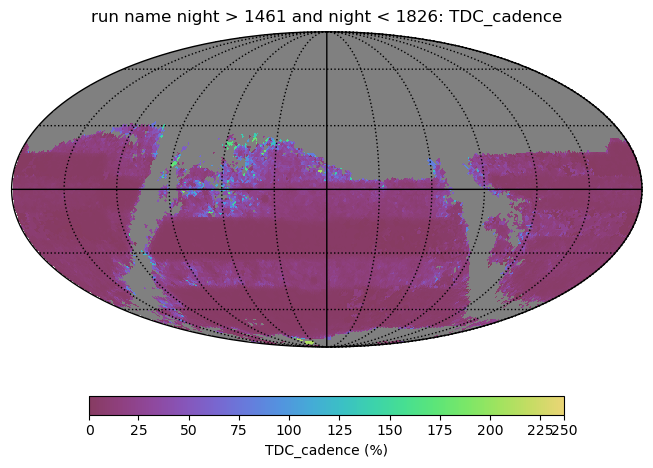

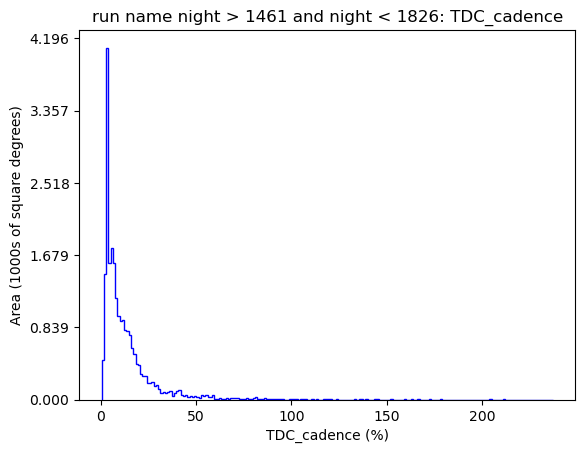

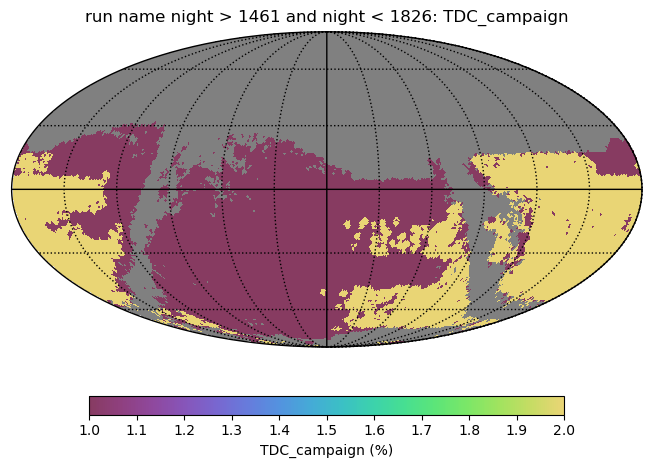

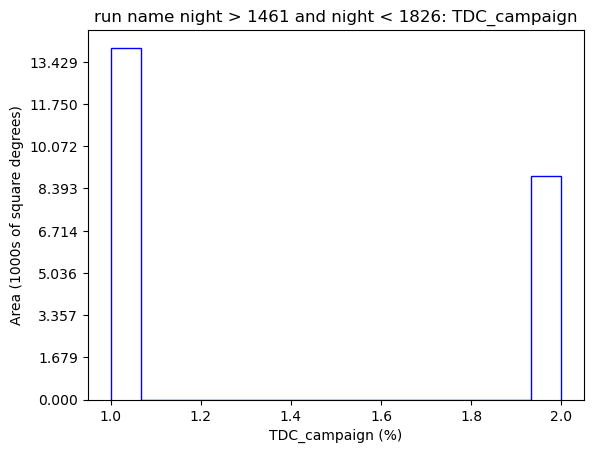

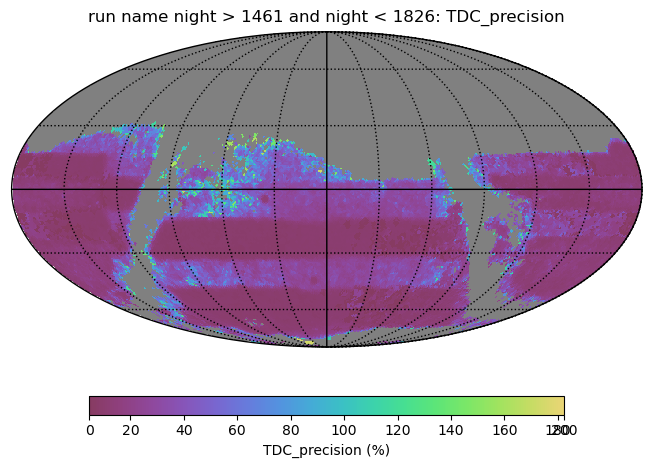

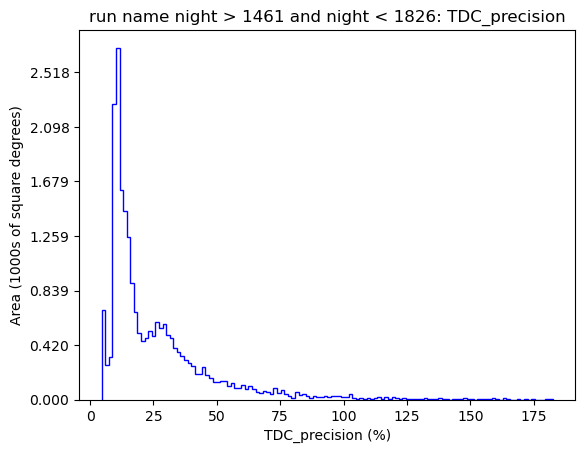

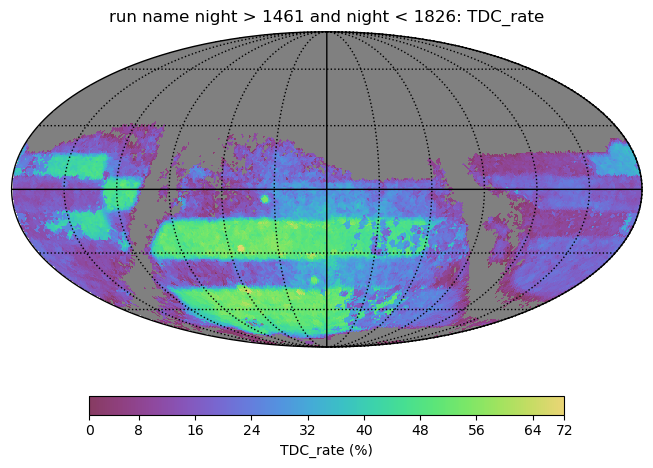

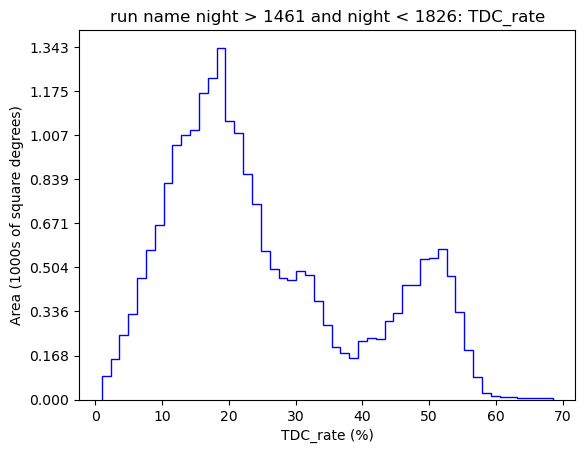

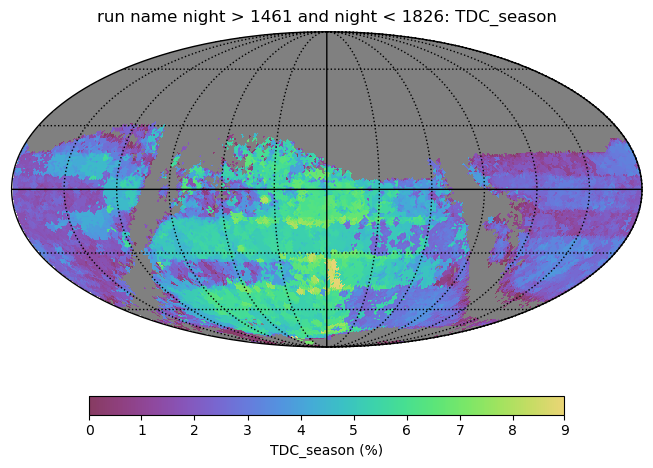

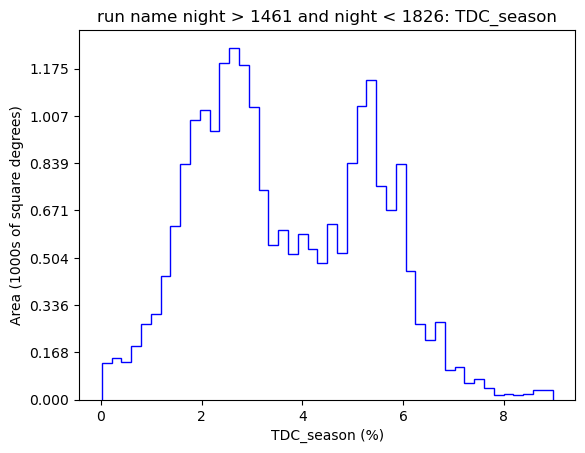

In [12]:
bundle_list = []
nside_tdc = 64
tdc_summary = [maf.metrics.MeanMetric(), maf.metrics.MedianMetric(), maf.metrics.RmsMetric()]
# Ideally need a way to do better on calculating the summary metrics
# for the high accuracy area.
slicer = maf.slicers.HealpixSlicer(nside=nside_tdc, use_cache=False)
tdcMetric = maf.metrics.TdcMetric(metric_name="TDC")
dustmap = maf.maps.DustMap(nside=nside_tdc, interp=False)
bundle = maf.MetricBundle(
    tdcMetric,
    slicer,
    constraint="night > %i and night < %i" % (4*365.25, 5*365.25),
    maps_list=[dustmap],
    summary_metrics=tdc_summary,
)
bundle_list.append(bundle)


bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)


In [13]:
bd['TDC_rate'].summary_values

{'Mean': 25.557593845272745,
 'Median': 21.14429582575429,
 'Rms': 14.494646687199044}